
# Hotel Reservations Cancellation Prediction


The aim of this project to predict the possible reservations that are going to cancelled by the customers by analyzing various features and variables associated with the reservation.


## Context

The online hotel reservation channels have dramatically changed booking possibilities and customers’ behavior. A significant number of hotel reservations are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with.

## Data Dictionary:

Here is a data dictionary summarizing the key columns in the dataset:

1)Column Name - Description
2)Booking_ID -	Unique identifier of each booking
3)no_of_adults -	Number of adults
4)no_of_children -	Number of children
5)no_of_weekend_nights -	Number of weekend nights (Saturday or Sunday)
6)no_of_week_nights -	Number of weeknights (Monday to Friday)
7)meal_type -	Meal type booked by the customer
8)required_car_parking_spaces -	Does the customer require a car parking space? (0 - No, 1 - Yes)
9)lead_time -	Number of days between the booking date and arrival date
10)arrival_year -	Year of arrival
11)arrival_month -	Month of arrival
12)arrival_date -	Date of arrival
13)market_segment -	Market segment designation
14)repeated_guest -	Is the customer a repeated guest? (0 - No, 1 - Yes)
15)no_previous_cancellations -	Number of previous bookings canceled by the customer prior to the current booking
16)previous_bookings_not_canceled -	Number of previous bookings not canceled by the customer prior to the current booking
17)avg_price_per_room -	Average price per day of the reservation (in euros)
no_of_special_requests -	Total number of special requests made by the customer (e.g., high floor, view from the room, etc)
18)booking_status -	Flag indicating if the booking was canceled or not

In [ ]:
#Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
#Loading dataset
df = pd.read_csv ('/content/Hotel_Reservation.csv')
df.head(10)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
5,INN00006,2,0,0,2,Meal Plan 2,0,Room_Type 1,346,2018,9,13,Online,0,0,0,115.00,1,Canceled
6,INN00007,2,0,1,3,Meal Plan 1,0,Room_Type 1,34,2017,10,15,Online,0,0,0,107.55,1,Not_Canceled
7,INN00008,2,0,1,3,Meal Plan 1,0,Room_Type 4,83,2018,12,26,Online,0,0,0,105.61,1,Not_Canceled
8,INN00009,3,0,0,4,Meal Plan 1,0,Room_Type 1,121,2018,7,6,Offline,0,0,0,96.90,1,Not_Canceled
9,INN00010,2,0,0,5,Meal Plan 1,0,Room_Type 4,44,2018,10,18,Online,0,0,0,133.44,3,Not_Canceled


In [ ]:
#Checking the shape of the dataset
df.shape

(36275, 19)

In [ ]:
#Dropping the identifier column
df.drop(['Booking_ID'], axis=1, inplace=True)

In [ ]:
df['date of arrival'] = df['arrival_year'].astype(str) + '/' + df['arrival_month'].astype(str) + '/' + df['arrival_date'].astype(str)

#type casting the date column
df['date of arrival'] = pd.to_datetime(df['date of arrival'],format='mixed', infer_datetime_format=True, errors='coerce',yearfirst=True)

#dropping the columns
df.drop(columns=['arrival_date', 'arrival_month', 'arrival_year'], inplace=True)

<ipython-input-8-dfb39c372457>:4: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['date of arrival'] = pd.to_datetime(df['date of arrival'],format='mixed', infer_datetime_format=True, errors='coerce',yearfirst=True)


In [ ]:
#checking for null values
df.isnull().sum()

,0
no_of_adults,0
no_of_children,0
no_of_weekend_nights,0
no_of_week_nights,0
type_of_meal_plan,0
required_car_parking_space,0
room_type_reserved,0
lead_time,0
market_segment_type,0
repeated_guest,0


In [ ]:
df.dropna(inplace=True)
df.reset_index()

,index,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,date of arrival
0,0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,65.00,0,Not_Canceled,2017-10-02
1,1,2,0,2,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,Not_Canceled,2018-11-06
2,2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,60.00,0,Canceled,2018-02-28
3,3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,0,Canceled,2018-05-20
4,4,2,0,1,1,Not Selected,0,Room_Type 1,48,Online,0,0,0,94.50,0,Canceled,2018-04-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36233,36270,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,Online,0,0,0,167.80,1,Not_Canceled,2018-08-03
36234,36271,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,Online,0,0,0,90.95,2,Canceled,2018-10-17
36235,36272,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,Online,0,0,0,98.39,2,Not_Canceled,2018-07-01
36236,36273,2,0,0,3,Not Selected,0,Room_Type 1,63,Online,0,0,0,94.50,0,Canceled,2018-04-21


In [ ]:
#checking data types
df.dtypes

,0
no_of_adults,int64
no_of_children,int64
no_of_weekend_nights,int64
no_of_week_nights,int64
type_of_meal_plan,object
required_car_parking_space,int64
room_type_reserved,object
lead_time,int64
market_segment_type,object
repeated_guest,int64


In [ ]:
# checking for unique values in each column
df.nunique()

,0
no_of_adults,5
no_of_children,6
no_of_weekend_nights,8
no_of_week_nights,18
type_of_meal_plan,4
required_car_parking_space,2
room_type_reserved,7
lead_time,352
market_segment_type,5
repeated_guest,2


Descriptive Statistics

In [ ]:
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,date of arrival
count,36238.000000,36238.000000,36238.000000,36238.000000,36238.000000,36238.000000,36238.000000,36238.000000,36238.000000,36238.000000,36238.000000,36238
mean,1.845301,0.105221,0.810475,2.204206,0.030934,85.275070,0.025553,0.023346,0.152961,103.437259,0.619957,2018-05-24 16:37:29.130746880
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017-07-01 00:00:00
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,0.000000,0.000000,0.000000,80.300000,0.000000,2018-02-28 00:00:00
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,0.000000,0.000000,0.000000,99.450000,0.000000,2018-06-12 00:00:00
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,0.000000,0.000000,0.000000,120.000000,1.000000,2018-09-19 00:00:00
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,1.000000,13.000000,58.000000,540.000000,5.000000,2018-12-31 00:00:00
std,0.518572,0.402540,0.870992,1.410784,0.173142,85.953561,0.157801,0.368483,1.753366,35.084264,0.786403,NaN


Here the minimum average price per room and number of adults is zero, which is not possible so, I will replace the price with with mean value and drop the rows with zero adults.

In [ ]:
df['avg_price_per_room'].replace(0,df['avg_price_per_room'].mean(), inplace=True)

In [ ]:
#drop where adults are 0
df.drop(df[df['no_of_adults'] == 0].index, inplace = True)

In [ ]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,date of arrival
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,65.00,0,Not_Canceled,2017-10-02
1,2,0,2,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,Not_Canceled,2018-11-06
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,60.00,0,Canceled,2018-02-28
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,0,Canceled,2018-05-20
4,2,0,1,1,Not Selected,0,Room_Type 1,48,Online,0,0,0,94.50,0,Canceled,2018-04-11


### Exploratory Data Analysis

In the exploratory data analysis, I will be visualizing the data to get a better understanding of the data and to see if there are any trends or patterns in the data. First I will begin with looking at the distribution of the data and then I will look at the relationship between the independent variables and the target variable.

Text(0.5, 1.0, 'Number of Children')

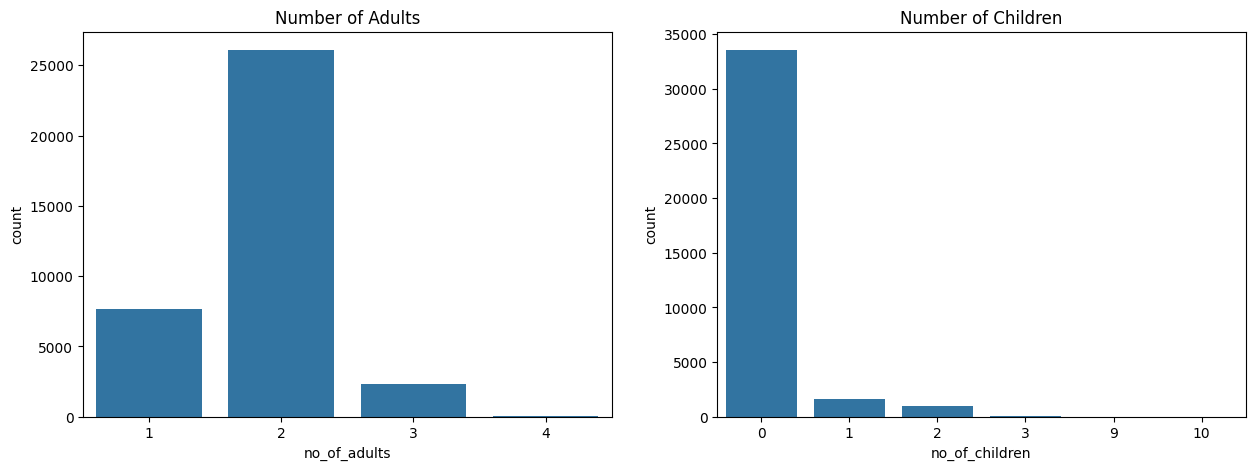

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.countplot( x = 'no_of_adults', data = df, ax=ax[0]).set_title('Number of Adults')
sns.countplot( x = 'no_of_children', data = df, ax=ax[1]).set_title('Number of Children')

These graphs shows the distribution of the guest information which includes number of adults and children. The majority of bookings were made for 2 adults with no children which could mean that most of the bookings were made for couples. The second most common booking was for 1 adult with no children which could mean that most of the bookings were made for business trips. A few bookings were made with 1 or 2 children which could be by a family.

### Time Spent at Hotel

Text(0.5, 1.0, 'Number of Week Nights')

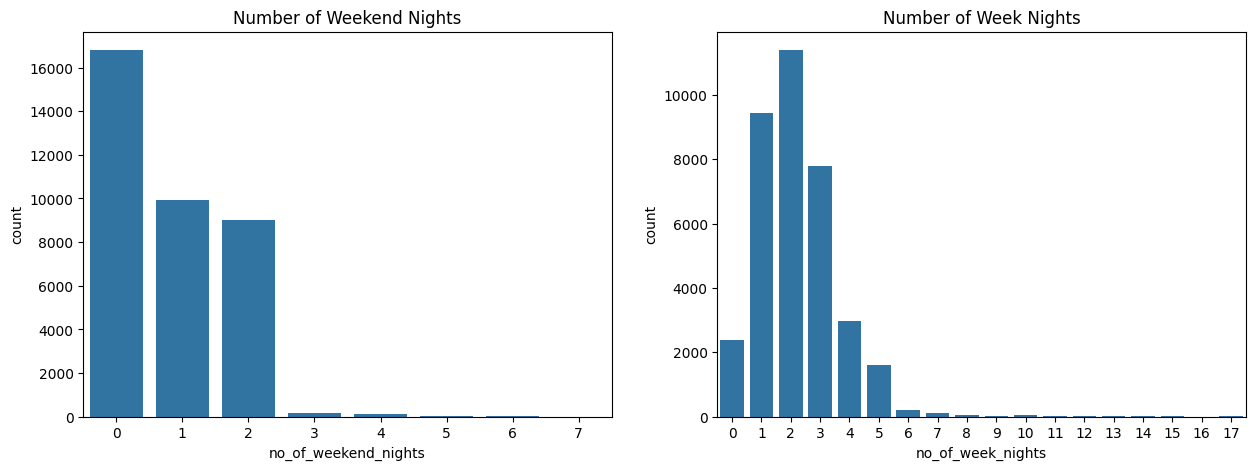

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.countplot(x = 'no_of_weekend_nights', data = df, ax=ax[0]).set_title('Number of Weekend Nights')
sns.countplot(x = 'no_of_week_nights', data = df, ax=ax[1]).set_title('Number of Week Nights')

These graphs shows that most of the guest reserved to staye at the hotel on non weekend nights. The majority of the hotel bookings were for 1 or 2 nights. However, considerable number of bookings take place for the weekends. From this I assume that the bookings for the weekends were for vacation and the those for the weekdays were for business trips or for other reasons.

## Date of Arrival

<Axes: xlabel='date of arrival', ylabel='Count'>

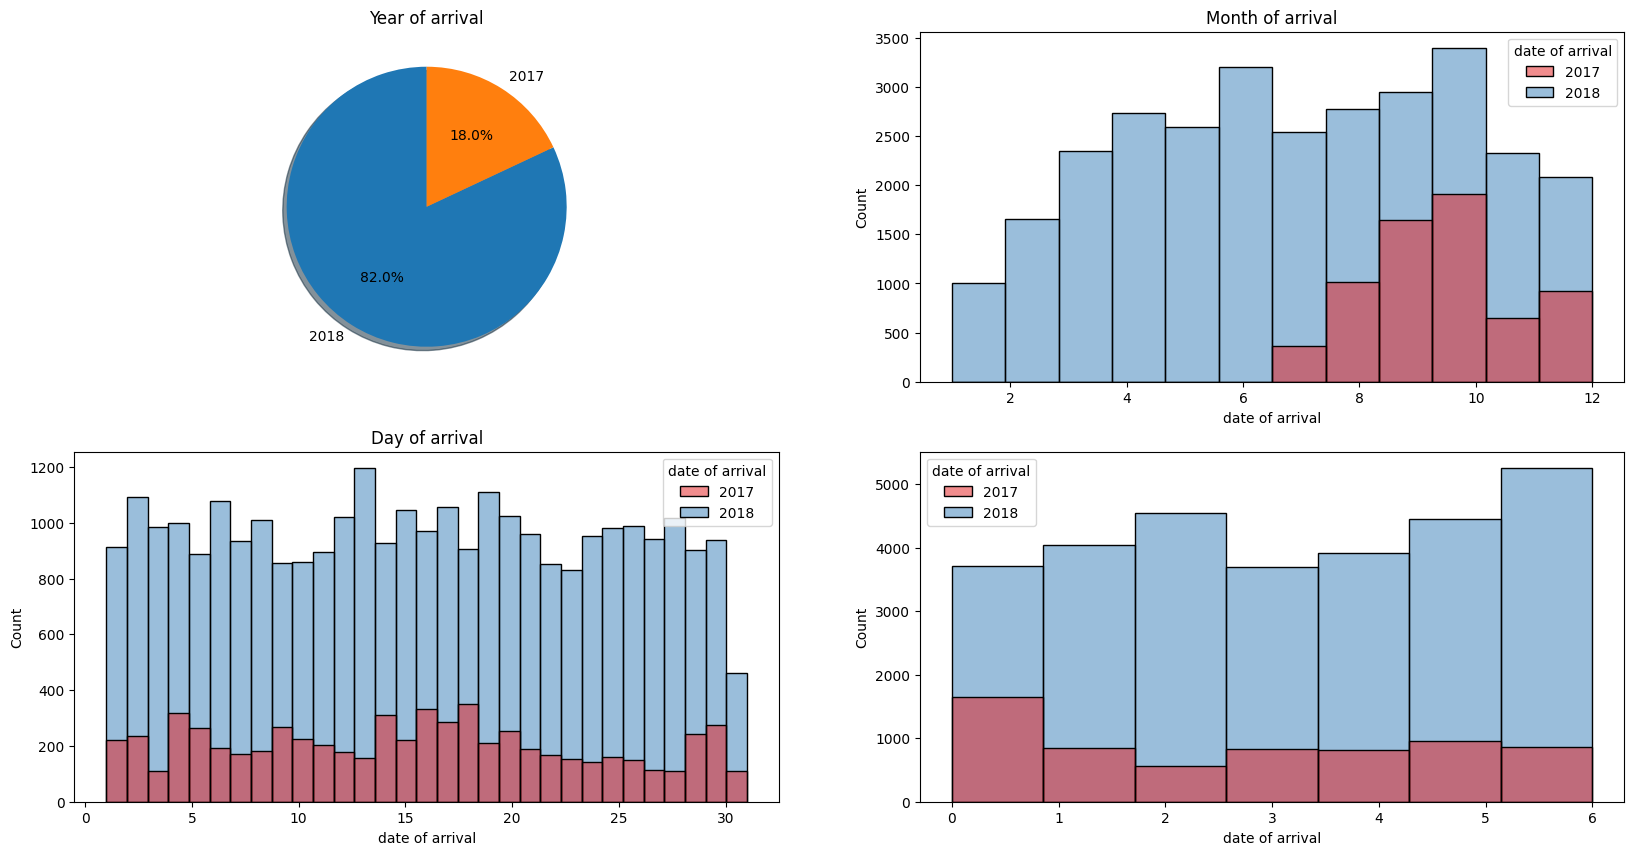

In [ ]:
fig, ax = plt.subplots(2,2,figsize=(20,10))

#year of arrival
ax[0,0].pie(df['date of arrival'].dt.year.value_counts(), labels = [2018,2017], autopct='%1.1f%%', shadow=True, startangle=90)
ax[0,0].set_title('Year of arrival')

#month of arrival
sns.histplot(x = df['date of arrival'].dt.month, ax=ax[0,1], bins=12, hue = df['date of arrival'].dt.year, palette = 'Set1').set_title('Month of arrival')

#day of arrival
sns.histplot(x = df['date of arrival'].dt.day, ax=ax[1,0], bins=31, hue = df['date of arrival'].dt.year, palette = 'Set1').set_title('Day of arrival')
#day of week of arrival
sns.histplot(x = df['date of arrival'].dt.dayofweek, ax=ax[1,1], bins=7, hue = df['date of arrival'].dt.year, palette = 'Set1')



These graphs shows the number of bookings for the specific date, day, month and year. In the dataset, majority of the bookings were in 2018, i.e. 82%. In both the years the month of October had most booings as compared to other months. In 2017 nearly 2000 bookings in october and in 2018 nearly 3500. In addtion to that June had highest number of bookings after October. Coming to the days of the month, In 2017, 4,14,16,18 days from the month had the most reservations. In 2018, 2,7,14,19 days of the month had the most reservations. In the days of the week, Sundays had the highest number of reservations in 2017, whereas the Saturdays had the highest number of reservations in 2018.

From the above visualizations, I can conclude that more bookings were made in June and October particulary on the second and third weeks and during the weekends.


## Services

Text(0.5, 1.0, 'Number of special requests')

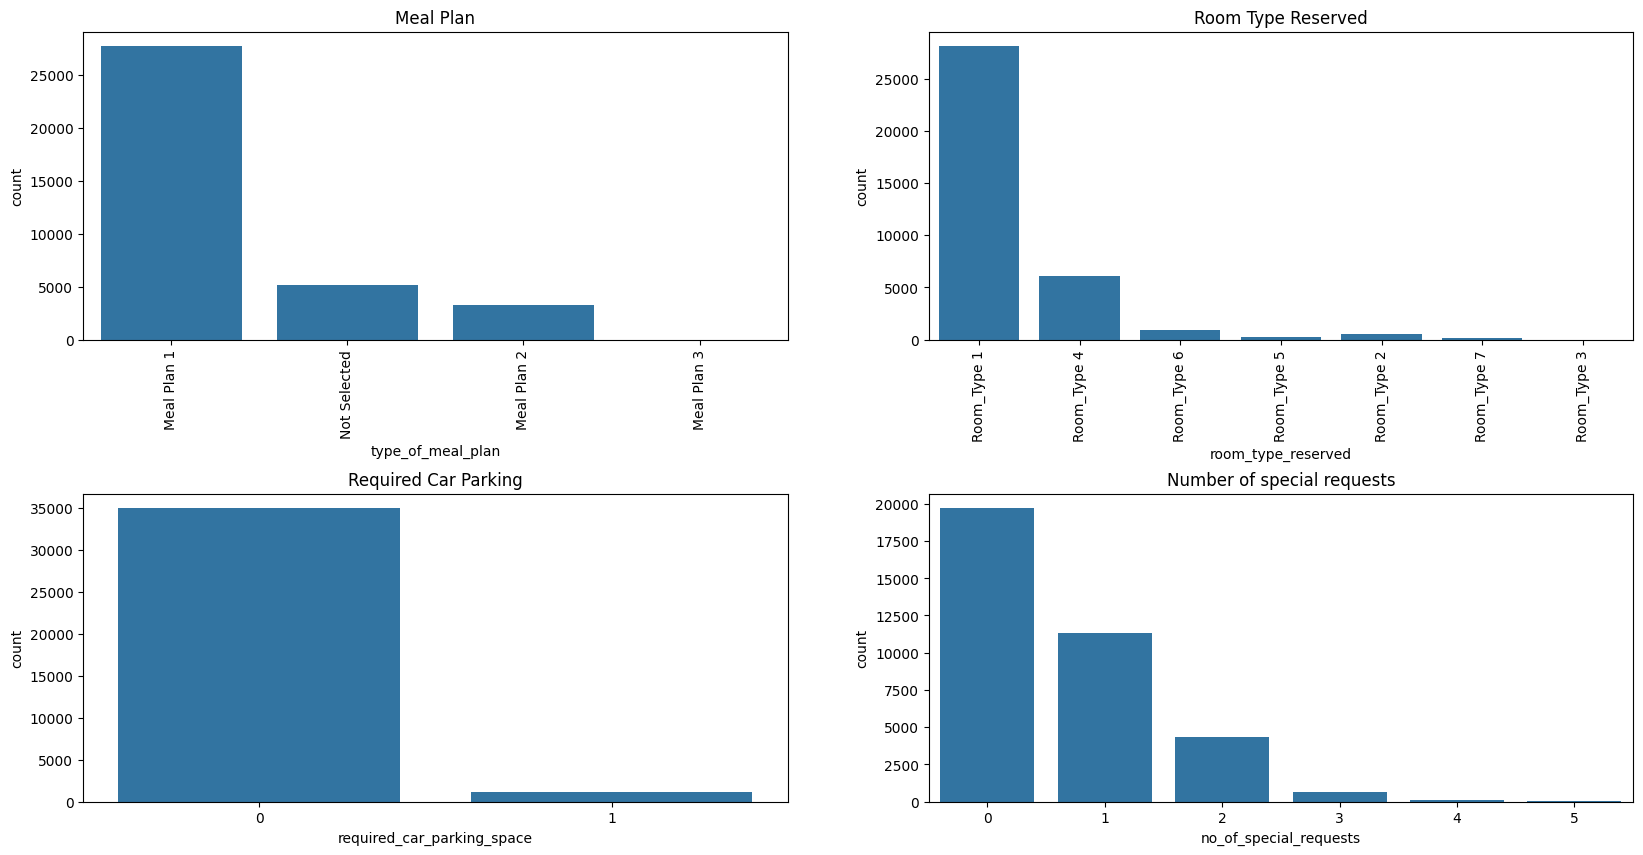

In [ ]:
fig, ax = plt.subplots(2,2,figsize=(20,10))
fig.subplots_adjust(hspace=0.5)

sns.countplot(x = 'type_of_meal_plan', data = df, ax=ax[0,0]).set_title('Meal Plan')
ax[0,0].xaxis.set_tick_params(rotation=90)

sns.countplot(x = 'room_type_reserved', data = df, ax=ax[0,1]).set_title('Room Type Reserved')
ax[0,1].xaxis.set_tick_params(rotation=90)

sns.countplot(x = 'required_car_parking_space', data = df, ax=ax[1,0]).set_title('Required Car Parking')

sns.countplot(x = 'no_of_special_requests', data = df, ax=ax[1,1]).set_title('Number of special requests')

The above graphs shows the type of services of the hotel taken by the guests during reservations. Majority of the guests preferred Meal Plan1 and Room Type 1 and no special requests during reservations and most of them don't require parking space. Moreover a significant number of reservations were made without specifiying the type of meal plan, which could mean that the guests might have meal outside the hotel. The required parking space graph also tells about the mode of transportation used by the guests. Most of the guests used public transport or taxi to reach the hotel.

### Lead time (days between date of reservation and date of arrival)

Text(0.5, 1.0, 'Lead Time in days')

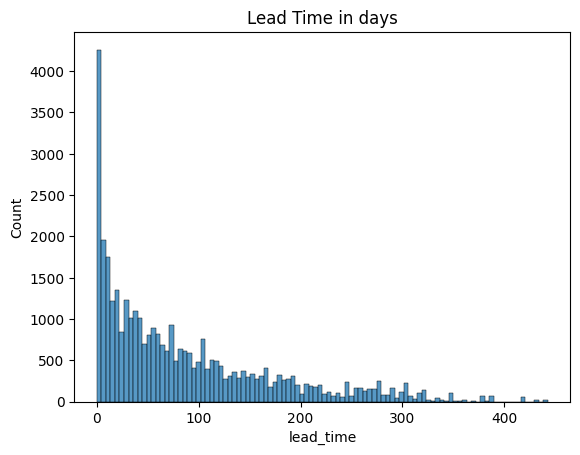

In [ ]:
sns.histplot(x = 'lead_time', data = df, bins=100).set_title('Lead Time in days')

This graph shows that significant number of reservations were made just one day before or on the day of arrival. In addtion to that most of the reservations were made 1 to 2 weeks before the date of arrival. However, there were also reservations made 2-3 months before the date of arrival. From this histogram, I made ab hypothesis that, the guest who have lead time very less are less likely to cancel the reservation as compared to the guest who have more lead time.

## Market Segment

Text(0.5, 1.0, 'Market Segment Type')

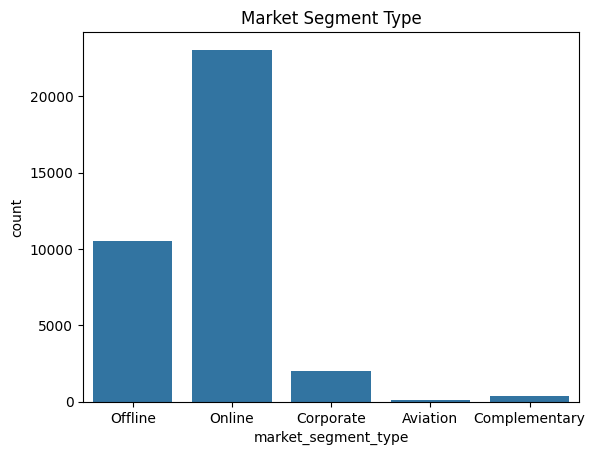

In [ ]:
sns.countplot(x = 'market_segment_type', data = df).set_title('Market Segment Type')



This graph shows the major gateways through which reservations were made at the hotel. Makority of the reservations were made through online platforms which means the hotel company has more presence on travel booking platforms. The second most common way of booking was through offline, which could be on arrival at the hotel or through a travel agent. The third most common way of booking was corporate, which could be through a company. Vert few of the bookings were made by aviation companies which highlights possibility of an airport near the hotel.



### Guest's previous experience with the hotel

Text(0.5, 1.0, 'Number of Previous Bookings Not Canceled')

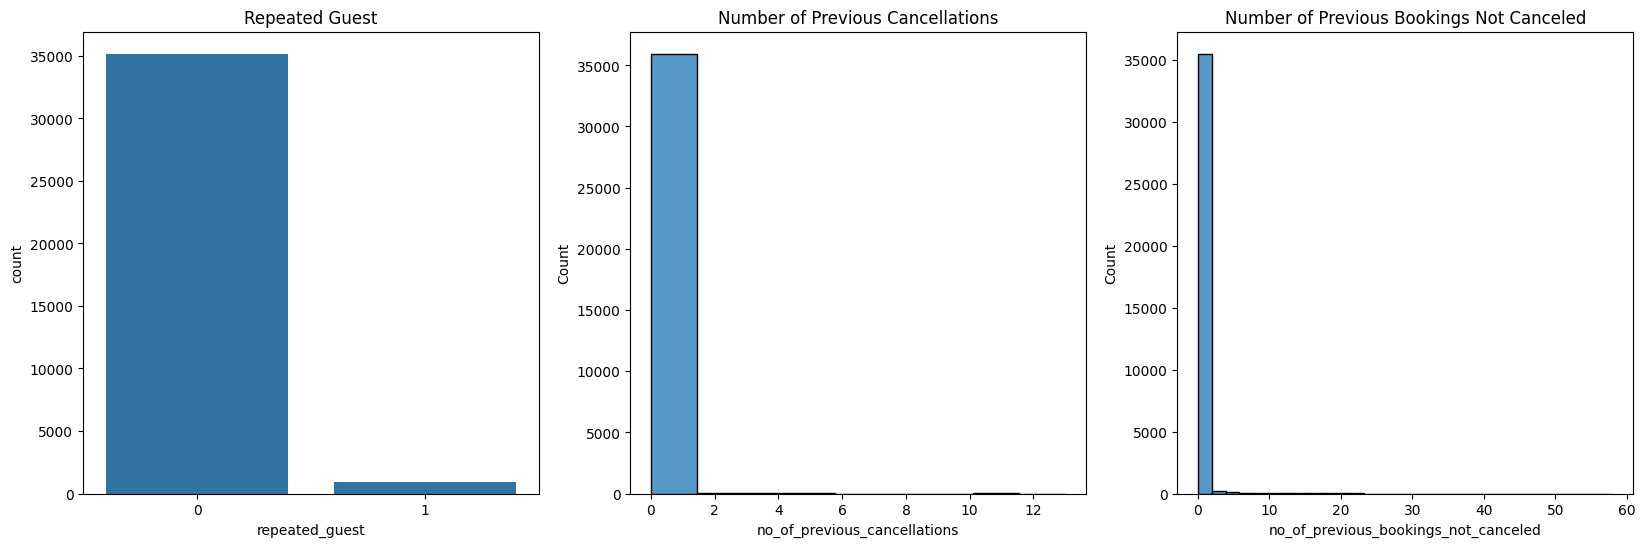

In [ ]:
fig, ax = plt.subplots(1,3,figsize=(20,6))

sns.countplot(x = 'repeated_guest', data = df, ax=ax[0]).set_title('Repeated Guest')

sns.histplot(x = 'no_of_previous_cancellations', data = df, ax=ax[1], bins = 9).set_title('Number of Previous Cancellations')

sns.histplot(x = 'no_of_previous_bookings_not_canceled', data = df, ax=ax[2], bins = 30).set_title('Number of Previous Bookings Not Canceled')



Majority of the reservations made at the hotel are by new guest, very few are the repeated guests at the hotel. This highlights the problem in the customer retention at the hotel. The hotel should focus on providing better services to the guests so that they would like to visit the hotel again. Since majority of the guest are new, so majority of the dataset has 0 pervious bookings cancellation. However, on a little bit closer look, we can see that there some guests who have cancelled their previous bookings.



### Average room price


Text(0.5, 1.0, 'Average Room Price')

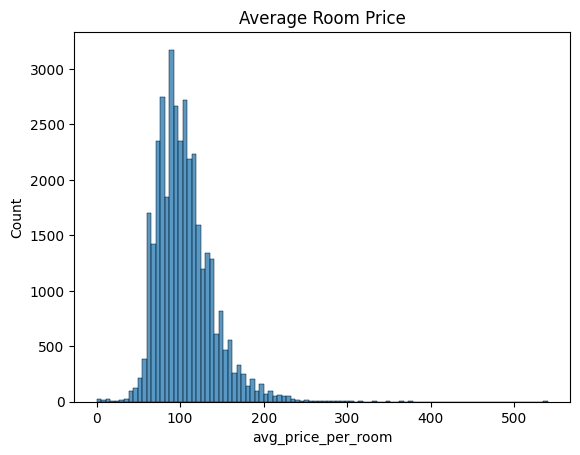

In [ ]:
    sns.histplot(x = 'avg_price_per_room', data = df, bins = 100).set_title('Average Room Price')



This graph shows the distribution of the room price. Majority of the reservations made had room price between 75 to 150. Very few of the reservations had room price more than 200.



Till now, I have plotted the distribution of data in all the variables and made some hypotheis around it. Now, I will look at the relationship between the independent variables and the target variable, to check the hypothesis.



### Guest Information and Cancellation


Text(0.5, 1.0, 'Number of Children')

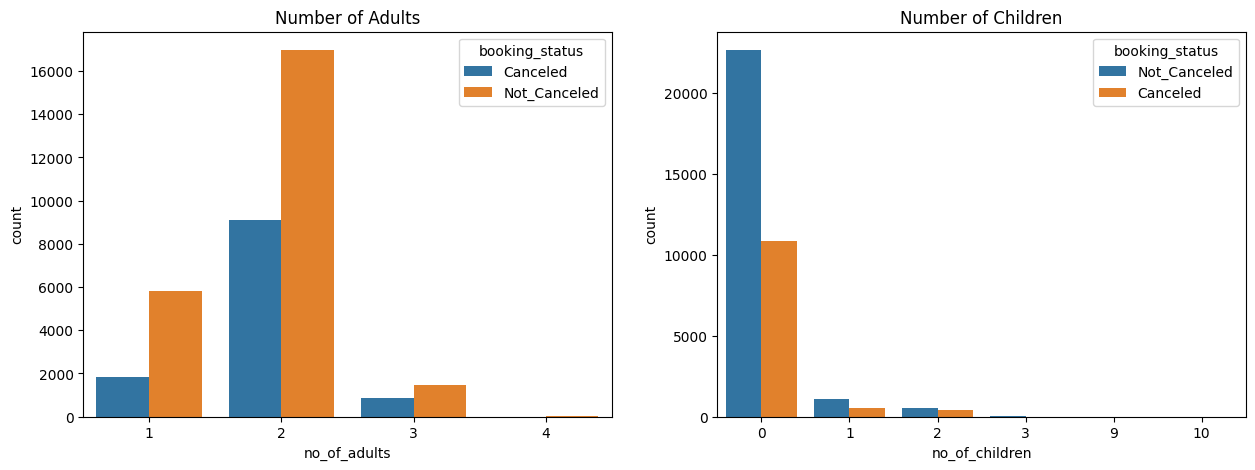

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.countplot( x = 'no_of_adults', data = df, ax=ax[0], hue= 'booking_status').set_title('Number of Adults')
sns.countplot( x = 'no_of_children', data = df, ax=ax[1], hue = 'booking_status').set_title('Number of Children')



Majority of the reservation cancellations were made when the reservation was made for two adults, probably with no children. The second most common cancellation was made when the reservation was made for one adult. However, the number of cancellation reduces, when the reservation includes children and had more than 2 adults.



### Time Spent at Hotel and Cancellation


Text(0.5, 1.0, 'Number of Week Nights')

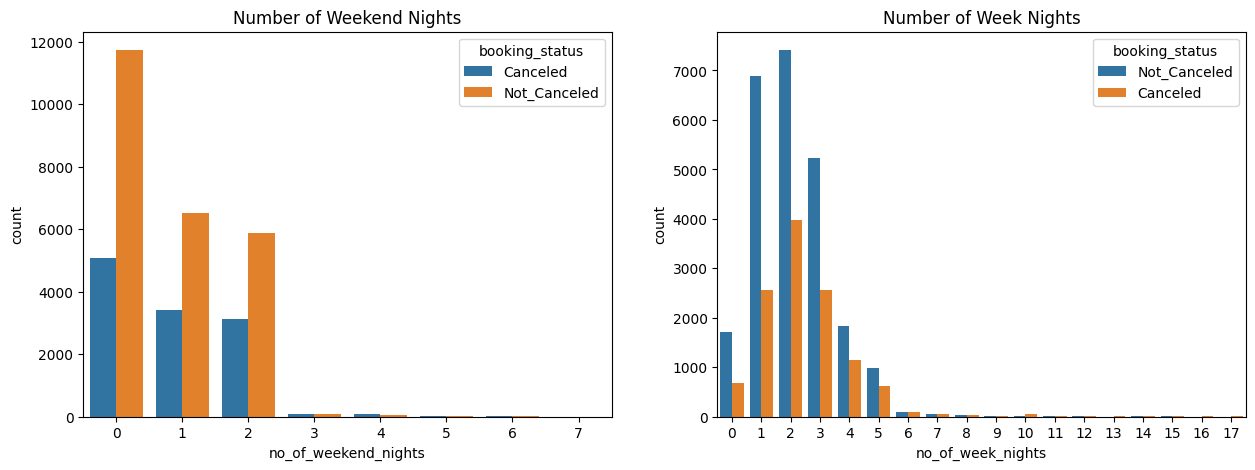

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.countplot(x = 'no_of_weekend_nights', data = df, ax=ax[0], hue = 'booking_status').set_title('Number of Weekend Nights')
sns.countplot(x = 'no_of_week_nights', data = df, ax=ax[1], hue = 'booking_status').set_title('Number of Week Nights')



These graphs reveal interesting facts about reservation cancellation. The reservations made to spend 1 or 2 weekends nights have lower count of being cancelled. As compared to the reservations made to spend 2 weekdays at the hotel had the highest cancellation count followed by 1 and 3 week days. This could mean that guest could cancel their reservation, if they were palnning to stay during the week days and for less than 3 days. However, this count is lower, when reservations are made for weekends.



### Services and Cancellation



Text(0.5, 1.0, 'Number of special requests')

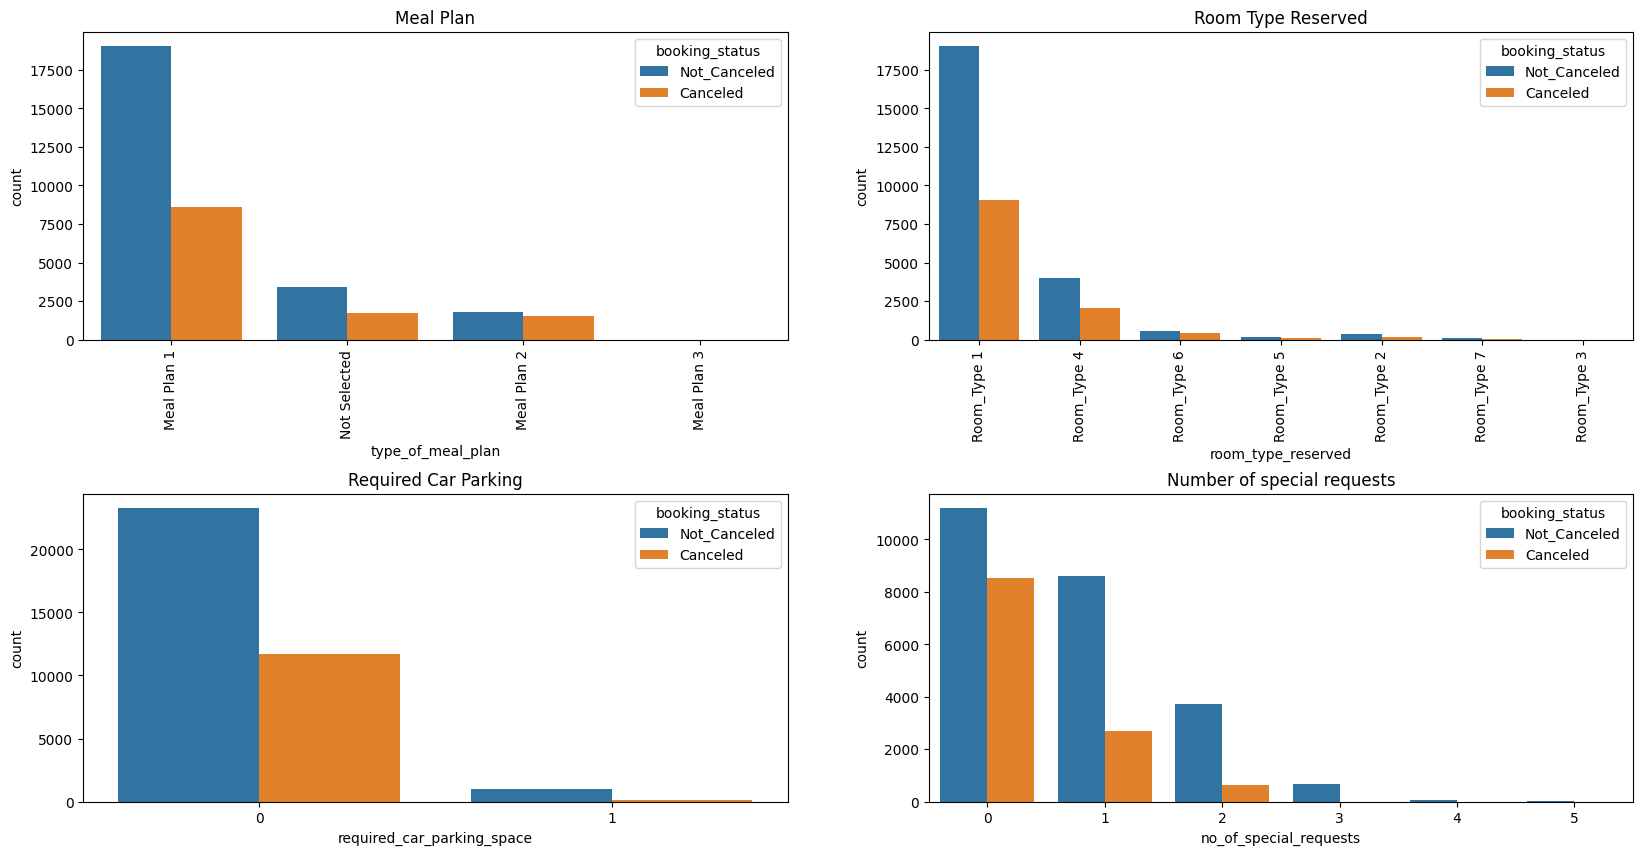

In [ ]:
fig, ax = plt.subplots(2,2,figsize=(20,10))
fig.subplots_adjust(hspace=0.5)

sns.countplot(x = 'type_of_meal_plan', data = df, ax=ax[0,0], hue = 'booking_status').set_title('Meal Plan')
ax[0,0].xaxis.set_tick_params(rotation=90)

sns.countplot(x = 'room_type_reserved', data = df, ax=ax[0,1], hue = 'booking_status').set_title('Room Type Reserved')
ax[0,1].xaxis.set_tick_params(rotation=90)

sns.countplot(x = 'required_car_parking_space', data = df, ax=ax[1,0], hue = 'booking_status').set_title('Required Car Parking')

sns.countplot(x = 'no_of_special_requests', data = df, ax=ax[1,1], hue = 'booking_status').set_title('Number of special requests')



In the above graphs, we can see that the ratio of cancelled and not cancelled reservations is almost same for all the services. Therefore, I can conclude that the services provided by the hotel does not have any impact on the reservation cancellation.



### Lead time and Cancellation


Text(0.5, 1.0, 'Lead Time in days')

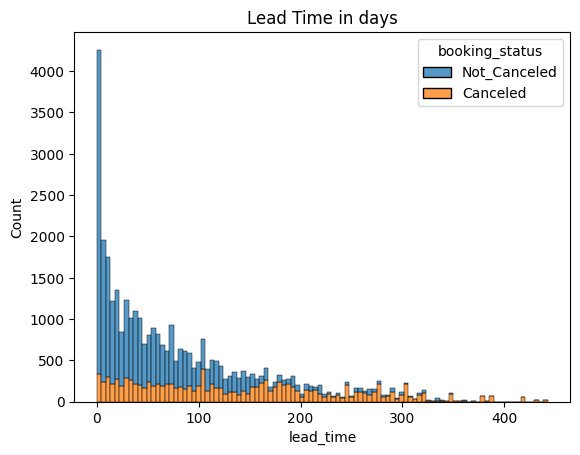

In [ ]:
sns.histplot(x = 'lead_time', data = df, bins=100, hue = 'booking_status', multiple = 'stack').set_title('Lead Time in days')



My hypothesis was true. With increase in lead time, the number of reservation cancellations also increases. The differnce in the number of reservations cancelled and not cancelled decreases as the lead time increases. This could mean that the guest who have lead time very less are less likely to cancel the reservation as compared to the guest who have more lead time.



### Market Segment and Cancellation


Text(0.5, 1.0, 'Market Segment Type')

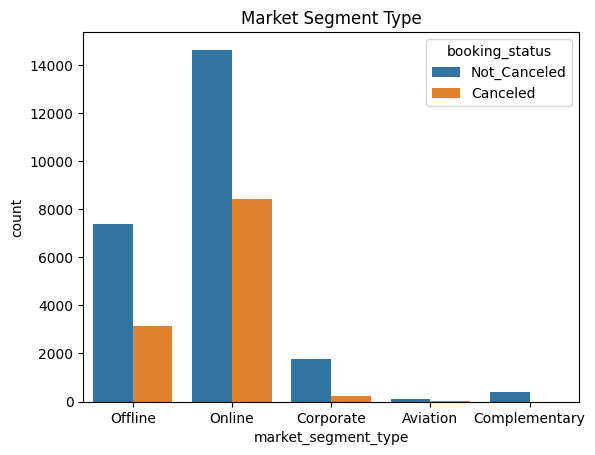

In [ ]:
sns.countplot(x = 'market_segment_type', data = df, hue = 'booking_status').set_title('Market Segment Type')



This graph shows the market segment of reservations and cancellation. Here most of the reservations are made through online platforms and thus it has the most number of cancellations. The second most common market segment is offline, which has the second most number of cancellations.



### Guest's previous experience and Cancellation


Text(0.5, 1.0, 'Repeated Guest')

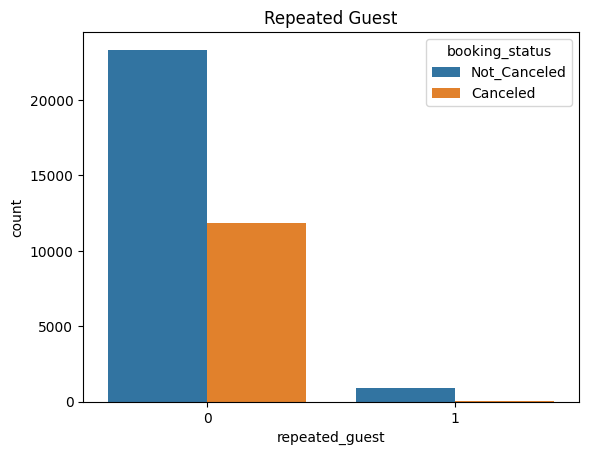

In [ ]:
sns.countplot(x = 'repeated_guest', data = df, hue = 'booking_status').set_title('Repeated Guest')



The previous guest are much less likely to cancel the reservation as compared to the new guest.



### Average room price and Cancellation


Text(0.5, 1.0, 'Average Room Price')

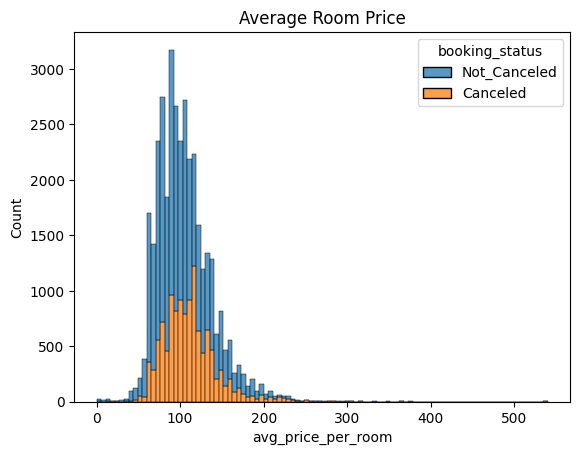

In [ ]:
sns.histplot(x = 'avg_price_per_room', data = df, bins = 100, hue = 'booking_status', multiple = 'stack').set_title('Average Room Price')



Most of the room prices are between 75-150 and the number of reservations cancellation mostly occur in the same range. Therefore, there is no relation between the room price and reservation cancellation.


## Conclusion:

The exploratory data analysis of the Hotel Reservations Cancellation Prediction project revealed several key insights:

1.**Guest Composition**: Reservations made for 2 adults with no children, possibly representing couples, had the highest cancellation count. Reservations with children involved had lower cancellation rates.

2.**Booking Timing**: Most reservations were made for weeknights and had significantly higher cancellations compared to those made for weekend nights.

3.**Year and Month**: The year 2018 had a higher cancellation rate compared to 2017, with the highest cancellations occurring in July and October.

4.**Services Impact**: Services opted for during reservation did not significantly impact reservation cancellations.

5.**Lead Time**: Lead time had a significant impact on reservation cancellations. Guests with shorter lead times were less likely to cancel, while longer lead times increased the likelihood of cancellations. This suggests that the hotel should consider accepting reservations with shorter lead times.

6.**Market Segment**: Reservations made through online platforms had the highest number of cancellations, emphasizing the importance of the hotel's online reputation.






